In [1]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print("Step 1: Loading preprocessed EEG features...")

# Load the EEG features
with open('eeg_features.pkl', 'rb') as f:
    eeg_data = pickle.load(f)

features = eeg_data['features']  # Shape: (200, 30, 5)
band_names = eeg_data['band_names']  # ['delta', 'theta', 'alpha', 'beta', 'gamma']
channel_names = eeg_data['channel_names']  # 30 channel names

print(f"Features shape: {features.shape}")
print(f"Band names: {band_names}")
print(f"Number of channels: {len(channel_names)}")


Step 1: Loading preprocessed EEG features...
Features shape: (200, 30, 5)
Band names: ['delta', 'theta', 'alpha', 'beta', 'gamma']
Number of channels: 30


In [3]:
print("\nStep 2: Loading preprocessed EEG labels...")

# Load the EEG labels
with open('eeg_labels.pkl', 'rb') as f:
    label_data = pickle.load(f)

labels = label_data['labels']  # Shape: (200, 5)
category_names = label_data['category_names']  # ['neutral', 'sadness', 'anger', 'happiness', 'calmness']

print(f"Labels shape: {labels.shape}")
print(f"Category names: {category_names}")

# Verify data consistency
assert features.shape[0] == labels.shape[0], "Number of samples mismatch between features and labels"
print(f"✓ Data consistency check passed: {features.shape[0]} samples in both features and labels")



Step 2: Loading preprocessed EEG labels...
Labels shape: (200, 5)
Category names: ['neutral', 'sadness', 'anger', 'happiness', 'calmness']
✓ Data consistency check passed: 200 samples in both features and labels


In [4]:
print("\nStep 3: Preparing training data...")

# Reshape features from (200, 30, 5) to (200, 150) for traditional ML models
# This flattens the channel and frequency band dimensions
n_samples, n_channels, n_bands = features.shape
X = features.reshape(n_samples, n_channels * n_bands)

print(f"Original features shape: {features.shape}")
print(f"Flattened features shape (X): {X.shape}")

# The labels are already in the correct format (200, 5) for multi-label classification
y = labels
print(f"Labels shape (y): {y.shape}")

# Print feature names for reference
feature_names = []
for ch_idx, ch_name in enumerate(channel_names):
    for band_idx, band_name in enumerate(band_names):
        feature_names.append(f"{ch_name}_{band_name}")

print(f"Total number of features: {len(feature_names)}")
print(f"Example feature names: {feature_names[:10]}...")



Step 3: Preparing training data...
Original features shape: (200, 30, 5)
Flattened features shape (X): (200, 150)
Labels shape (y): (200, 5)
Total number of features: 150
Example feature names: ['Fp1_delta', 'Fp1_theta', 'Fp1_alpha', 'Fp1_beta', 'Fp1_gamma', 'Fp2_delta', 'Fp2_theta', 'Fp2_alpha', 'Fp2_beta', 'Fp2_gamma']...


In [5]:
print("\nStep 4: Creating train-test split (80-20)...")

# Split the data with stratification based on the dominant emotion class
# First, convert one-hot labels to single class labels for stratification
y_single_class = np.argmax(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y_single_class
)

print(f"Training set - X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set - X_test: {X_test.shape}, y_test: {y_test.shape}")



Step 4: Creating train-test split (80-20)...
Training set - X_train: (160, 150), y_train: (160, 5)
Testing set - X_test: (40, 150), y_test: (40, 5)



Step 5: Analyzing class distribution...

Training set class distribution:
  neutral: 32 samples (20.0%)
  sadness: 32 samples (20.0%)
  anger: 32 samples (20.0%)
  happiness: 32 samples (20.0%)
  calmness: 32 samples (20.0%)

Testing set class distribution:
  neutral: 8 samples (20.0%)
  sadness: 8 samples (20.0%)
  anger: 8 samples (20.0%)
  happiness: 8 samples (20.0%)
  calmness: 8 samples (20.0%)


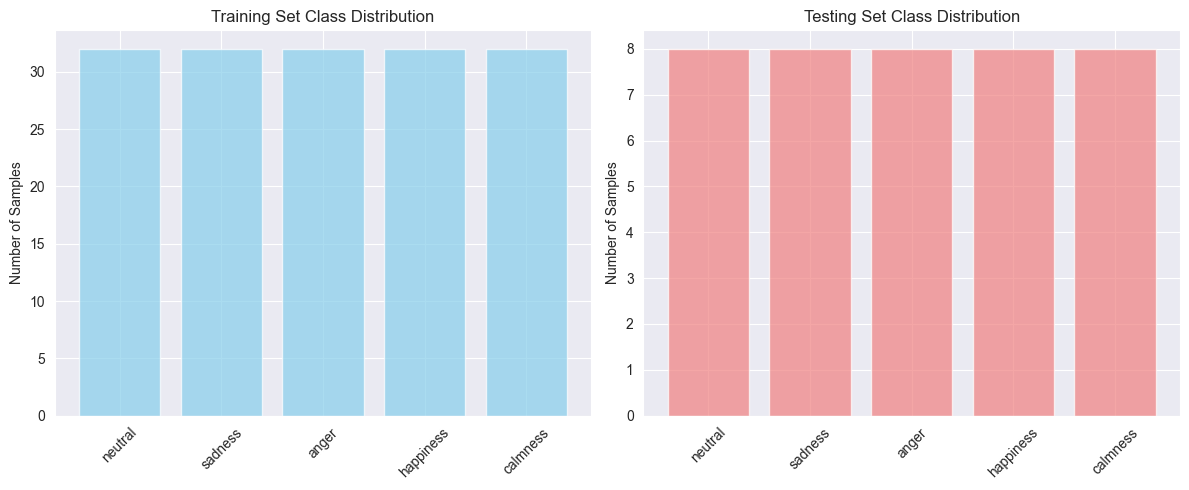

In [6]:
print("\nStep 5: Analyzing class distribution...")

# Analyze class distribution in train and test sets
def analyze_class_distribution(y_data, set_name):
    print(f"\n{set_name} set class distribution:")
    y_single = np.argmax(y_data, axis=1)
    for i, class_name in enumerate(category_names):
        count = np.sum(y_single == i)
        percentage = (count / len(y_data)) * 100
        print(f"  {class_name}: {count} samples ({percentage:.1f}%)")
    return y_single

y_train_single = analyze_class_distribution(y_train, "Training")
y_test_single = analyze_class_distribution(y_test, "Testing")

# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
train_counts = [np.sum(y_train_single == i) for i in range(len(category_names))]
ax1.bar(category_names, train_counts, color='skyblue', alpha=0.7)
ax1.set_title('Training Set Class Distribution')
ax1.set_ylabel('Number of Samples')
ax1.tick_params(axis='x', rotation=45)

# Testing set distribution
test_counts = [np.sum(y_test_single == i) for i in range(len(category_names))]
ax2.bar(category_names, test_counts, color='lightcoral', alpha=0.7)
ax2.set_title('Testing Set Class Distribution')
ax2.set_ylabel('Number of Samples')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [7]:
print("\nStep 6: Feature scaling (standardization)...")

# Standardize the features (important for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Show statistics before and after scaling
print(f"\nBefore scaling:")
print(f"  X_train - mean: {X_train.mean():.4f}, std: {X_train.std():.4f}")
print(f"  X_test - mean: {X_test.mean():.4f}, std: {X_test.std():.4f}")

print(f"\nAfter scaling:")
print(f"  X_train_scaled - mean: {X_train_scaled.mean():.4f}, std: {X_train_scaled.std():.4f}")
print(f"  X_test_scaled - mean: {X_test_scaled.mean():.4f}, std: {X_test_scaled.std():.4f}")



Step 6: Feature scaling (standardization)...
X_train_scaled shape: (160, 150)
X_test_scaled shape: (40, 150)

Before scaling:
  X_train - mean: 7.4131, std: 9.4790
  X_test - mean: 8.5926, std: 14.2911

After scaling:
  X_train_scaled - mean: -0.0000, std: 1.0000
  X_test_scaled - mean: 0.1552, std: 1.3314


In [8]:
print("\nStep 7: Summary of prepared data...")

print("=" * 50)
print("DATA PREPARATION SUMMARY")
print("=" * 50)
print(f"Original data shape: {features.shape} (samples, channels, bands)")
print(f"Flattened feature shape: {X.shape} (samples, features)")
print(f"Label shape: {y.shape} (samples, classes)")
print(f"\nTraining data:")
print(f"  X_train: {X_train.shape} (unscaled)")
print(f"  X_train_scaled: {X_train_scaled.shape} (scaled)")
print(f"  y_train: {y_train.shape}")
print(f"\nTesting data:")
print(f"  X_test: {X_test.shape} (unscaled)")
print(f"  X_test_scaled: {X_test_scaled.shape} (scaled)")
print(f"  y_test: {y_test.shape}")
print(f"\nFeature information:")
print(f"  Total features: {X.shape[1]} ({n_channels} channels × {n_bands} bands)")
print(f"  Band names: {band_names}")
print(f"  Classes: {category_names}")
print(f"\nData is ready for model training!")



Step 7: Summary of prepared data...
DATA PREPARATION SUMMARY
Original data shape: (200, 30, 5) (samples, channels, bands)
Flattened feature shape: (200, 150) (samples, features)
Label shape: (200, 5) (samples, classes)

Training data:
  X_train: (160, 150) (unscaled)
  X_train_scaled: (160, 150) (scaled)
  y_train: (160, 5)

Testing data:
  X_test: (40, 150) (unscaled)
  X_test_scaled: (40, 150) (scaled)
  y_test: (40, 5)

Feature information:
  Total features: 150 (30 channels × 5 bands)
  Band names: ['delta', 'theta', 'alpha', 'beta', 'gamma']
  Classes: ['neutral', 'sadness', 'anger', 'happiness', 'calmness']

Data is ready for model training!


In [9]:
print("\nStep 8: Saving prepared data for model training...")

# Save the prepared data
training_data = {
    'X_train': X_train,
    'X_test': X_test,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test,
    'scaler': scaler,
    'feature_names': feature_names,
    'category_names': category_names,
    'band_names': band_names,
    'channel_names': channel_names,
    'data_info': {
        'n_samples': n_samples,
        'n_channels': n_channels,
        'n_bands': n_bands,
        'n_features': X.shape[1],
        'n_classes': len(category_names),
        'train_size': X_train.shape[0],
        'test_size': X_test.shape[0]
    }
}

with open('training_data.pkl', 'wb') as f:
    pickle.dump(training_data, f)

print("Training data saved to 'training_data.pkl'")
print("\nTo load this data in another file:")
print("import pickle")
print("with open('training_data.pkl', 'rb') as f:")
print("    data = pickle.load(f)")
print("X_train_scaled = data['X_train_scaled']")
print("y_train = data['y_train']")
print("X_test_scaled = data['X_test_scaled']")
print("y_test = data['y_test']")



Step 8: Saving prepared data for model training...
Training data saved to 'training_data.pkl'

To load this data in another file:
import pickle
with open('training_data.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_scaled = data['X_train_scaled']
y_train = data['y_train']
X_test_scaled = data['X_test_scaled']
y_test = data['y_test']


--- Step 1: Data Preparation ---
y_train is one-hot encoded. Converting to 1D array of labels.
Shape of X_train_scaled: (160, 150)
Shape of y_train_labels: (160,)

--- Step 2: Model Initialization and Training ---
Training the Logistic Regression model...
Model training complete.

--- Step 3: Prediction and Evaluation ---
Model Accuracy: 52.50%

Classification Report:
              precision    recall  f1-score   support

   Emotion 0       0.40      0.25      0.31         8
   Emotion 1       0.60      0.75      0.67         8
   Emotion 2       0.50      0.38      0.43         8
   Emotion 3       0.50      0.50      0.50         8
   Emotion 4       0.55      0.75      0.63         8

    accuracy                           0.53        40
   macro avg       0.51      0.53      0.51        40
weighted avg       0.51      0.53      0.51        40


--- Step 4: Visualizing the Confusion Matrix ---


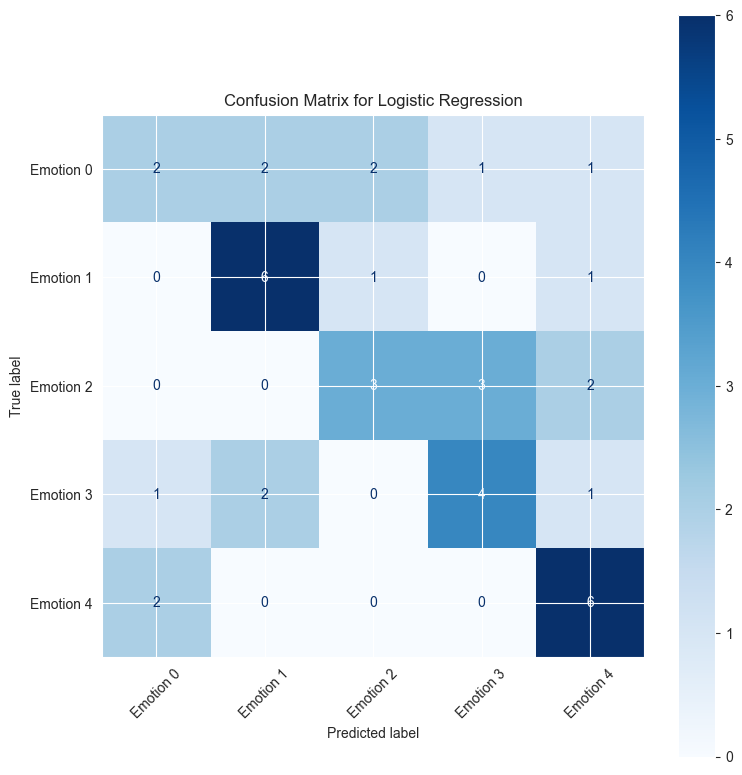

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# =============================================================================
# --- Model Training: Logistic Regression ---
# This script trains a Logistic Regression model on the preprocessed and scaled
# EEG features and evaluates its performance.
#
# Assumes the following variables are pre-loaded:
#   - X_train_scaled: (n_train_samples, 150)
#   - y_train:        (n_train_samples, 5) or (n_train_samples,)
#   - X_test_scaled:  (n_test_samples, 150)
#   - y_test:         (n_test_samples, 5) or (n_test_samples,)
# =============================================================================

print("--- Step 1: Data Preparation ---")

# Scikit-learn models expect class labels as a 1D array (e.g., [0, 1, 4, 2...]).
# Your y_train has a shape of (samples, 5), which is one-hot encoded.
# We need to convert it back to a single column of labels.
if y_train.ndim == 2 and y_train.shape[1] > 1:
    print("y_train is one-hot encoded. Converting to 1D array of labels.")
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    print("y_train is already in the correct 1D label format.")
    y_train_labels = y_train
    y_test_labels = y_test

print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train_labels: {y_train_labels.shape}")


print("\n--- Step 2: Model Initialization and Training ---")

# Initialize the Logistic Regression model.
# max_iter is increased to ensure the model converges.
# random_state ensures reproducibility.
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the scaled training data
print("Training the Logistic Regression model...")
log_reg_model.fit(X_train_scaled, y_train_labels)
print("Model training complete.")


print("\n--- Step 3: Prediction and Evaluation ---")

# Make predictions on the scaled test data
y_pred = log_reg_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
# This shows precision, recall, and F1-score for each emotion class
print("\nClassification Report:")
# Assuming 5 emotions, we create generic labels for the report
emotion_labels = [f"Emotion {i}" for i in range(y_train.shape[1] if y_train.ndim == 2 else np.max(y_train_labels) + 1)]
print(classification_report(y_test_labels, y_pred, target_names=emotion_labels))


print("\n--- Step 4: Visualizing the Confusion Matrix ---")

# A confusion matrix is a great way to see which emotions the model
# is confusing with others.
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_estimator(
    log_reg_model,
    X_test_scaled,
    y_test_labels,
    ax=ax,
    display_labels=emotion_labels,
    cmap='Blues'
)
ax.set_title("Confusion Matrix for Logistic Regression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Step 1: Data Preparation ---
y_train is one-hot encoded. Converting to 1D array of labels.
Shape of X_train_scaled: (160, 150)
Shape of y_train_labels: (160,)

--- Step 2: Model Initialization and Training ---
Training the SVM model (this might take a moment)...
Model training complete.

--- Step 3: Prediction and Evaluation ---
Model Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

   Emotion 0       0.38      0.38      0.38         8
   Emotion 1       0.71      0.62      0.67         8
   Emotion 2       0.44      0.50      0.47         8
   Emotion 3       0.50      0.50      0.50         8
   Emotion 4       0.50      0.50      0.50         8

    accuracy                           0.50        40
   macro avg       0.51      0.50      0.50        40
weighted avg       0.51      0.50      0.50        40


--- Step 4: Visualizing the Confusion Matrix ---


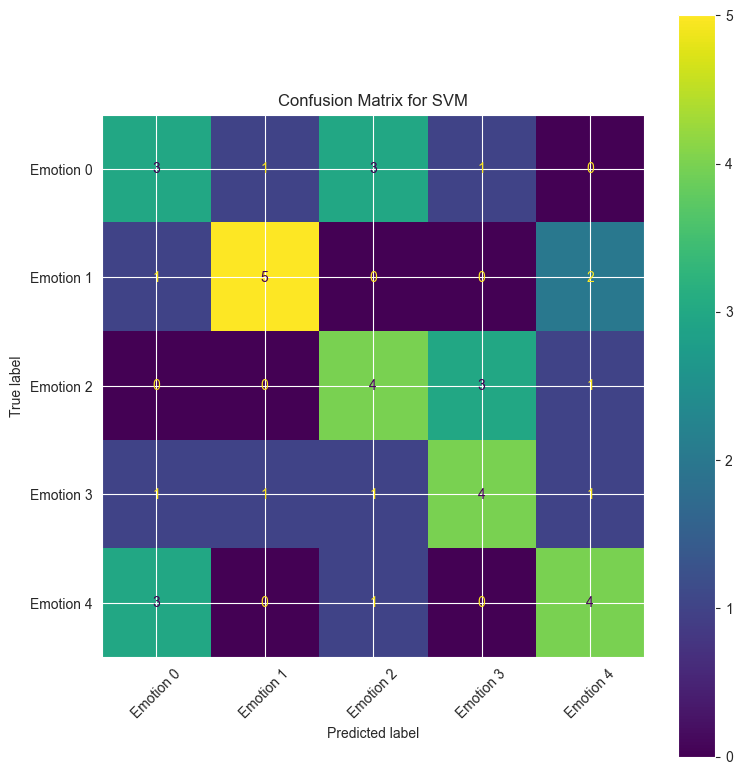

In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# =============================================================================
# --- Model Training: Support Vector Machine (SVM) ---
# This script trains an SVM model with an RBF kernel on the preprocessed and
# scaled EEG features and evaluates its performance.
#
# Assumes the following variables are pre-loaded:
#   - X_train_scaled: (n_train_samples, 150)
#   - y_train:        (n_train_samples, 5) or (n_train_samples,)
#   - X_test_scaled:  (n_test_samples, 150)
#   - y_test:         (n_test_samples, 5) or (n_test_samples,)
# =============================================================================

print("--- Step 1: Data Preparation ---")

# Convert one-hot encoded y_train/y_test to 1D label arrays if needed
if y_train.ndim == 2 and y_train.shape[1] > 1:
    print("y_train is one-hot encoded. Converting to 1D array of labels.")
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    print("y_train is already in the correct 1D label format.")
    y_train_labels = y_train
    y_test_labels = y_test

print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train_labels: {y_train_labels.shape}")


print("\n--- Step 2: Model Initialization and Training ---")

# Initialize the Support Vector Classifier (SVC).
# kernel='rbf' is a powerful default for finding non-linear patterns.
# C is the regularization parameter.
# random_state ensures reproducibility.
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model on the scaled training data
print("Training the SVM model (this might take a moment)...")
svm_model.fit(X_train_scaled, y_train_labels)
print("Model training complete.")


print("\n--- Step 3: Prediction and Evaluation ---")

# Make predictions on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
print("\nClassification Report:")
emotion_labels = [f"Emotion {i}" for i in range(y_train.shape[1] if y_train.ndim == 2 else np.max(y_train_labels) + 1)]
print(classification_report(y_test_labels, y_pred, target_names=emotion_labels))


print("\n--- Step 4: Visualizing the Confusion Matrix ---")

# Visualize the model's performance on a confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_estimator(
    svm_model,
    X_test_scaled,
    y_test_labels,
    ax=ax,
    display_labels=emotion_labels,
    cmap='viridis'
)
ax.set_title("Confusion Matrix for SVM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Step 1: Data Preparation ---
y_train is one-hot encoded. Converting to 1D array of labels.
Shape of X_train_scaled: (160, 150)
Shape of y_train_labels: (160,)

--- Step 2: Model Initialization and Training ---
Training the XGBoost model...
Model training complete.

--- Step 3: Prediction and Evaluation ---
Model Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

   Emotion 0       0.50      0.38      0.43         8
   Emotion 1       0.60      0.75      0.67         8
   Emotion 2       0.42      0.62      0.50         8
   Emotion 3       0.75      0.38      0.50         8
   Emotion 4       0.38      0.38      0.38         8

    accuracy                           0.50        40
   macro avg       0.53      0.50      0.49        40
weighted avg       0.53      0.50      0.49        40


--- Step 4: Visualizing the Confusion Matrix ---


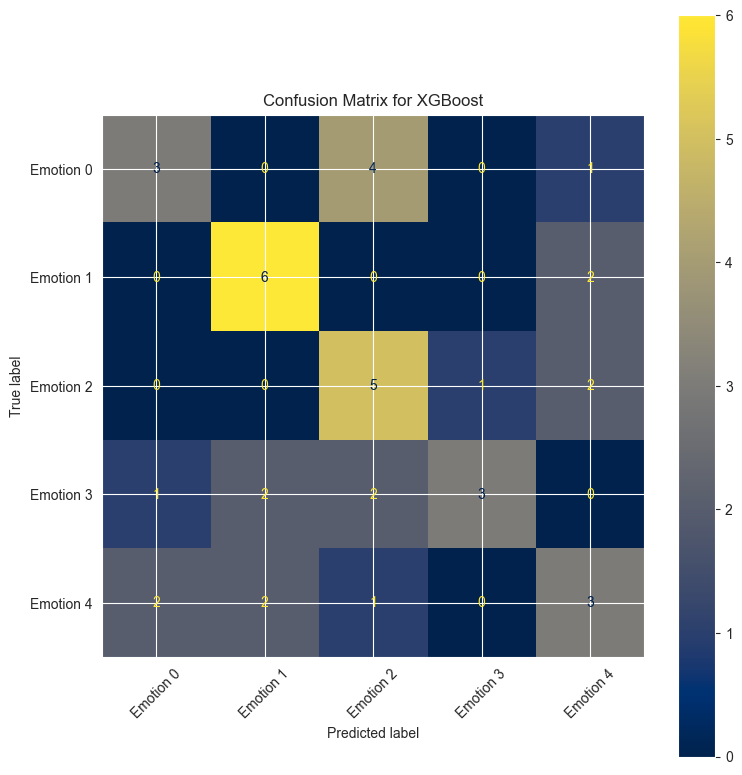

In [14]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# =============================================================================
# --- Model Training: XGBoost Classifier ---
# This script trains an XGBoost model on the preprocessed and scaled
# EEG features and evaluates its performance.
#
# Assumes the following variables are pre-loaded:
#   - X_train_scaled: (n_train_samples, 150)
#   - y_train:        (n_train_samples, 5) or (n_train_samples,)
#   - X_test_scaled:  (n_test_samples, 150)
#   - y_test:         (n_test_samples, 5) or (n_test_samples,)
# =============================================================================

print("--- Step 1: Data Preparation ---")

# Convert one-hot encoded y_train/y_test to 1D label arrays if needed
if y_train.ndim == 2 and y_train.shape[1] > 1:
    print("y_train is one-hot encoded. Converting to 1D array of labels.")
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    print("y_train is already in the correct 1D label format.")
    y_train_labels = y_train
    y_test_labels = y_test

print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train_labels: {y_train_labels.shape}")


print("\n--- Step 2: Model Initialization and Training ---")

# Initialize the XGBoost Classifier.
# objective='multi:softmax' is used for multi-class classification.
# n_estimators is the number of trees to build.
# random_state ensures reproducibility.
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_labels)), # Specify the number of classes
    n_estimators=100,
    seed=42
)

# Train the model on the scaled training data
print("Training the XGBoost model...")
xgb_model.fit(X_train_scaled, y_train_labels)
print("Model training complete.")


print("\n--- Step 3: Prediction and Evaluation ---")

# Make predictions on the scaled test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
print("\nClassification Report:")
emotion_labels = [f"Emotion {i}" for i in range(len(np.unique(y_train_labels)))]
print(classification_report(y_test_labels, y_pred, target_names=emotion_labels))


print("\n--- Step 4: Visualizing the Confusion Matrix ---")

# Visualize the model's performance on a confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_estimator(
    xgb_model,
    X_test_scaled,
    y_test_labels,
    ax=ax,
    display_labels=emotion_labels,
    cmap='cividis'
)
ax.set_title("Confusion Matrix for XGBoost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
